<a href="https://colab.research.google.com/github/YLiu95/Quantitative_Finance/blob/main/Alpha%2C_systematic_trading%2C_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alpha, systemic trading, machine learning

Create and backtest an Alpha generating strategy for trading AAPL.

**Methodology:**

1. Construsct Alpha factors to generate trading signals.
2. Identify the most relevant Alpha factors using statistical and machine learning methods.
3. Backtest the strategy using out of sample data to ensure it is profitable and robust. 

**Results:**

The trading strategy has performed well in terms of generating positive returns, managing downside risk, and outperforming the market/benchmark.

This is supported by the fact that the `total return` was **24.64%** and the `annualised return` was **10.52%**. The `Sharpe ratio` of **5.5300**, `Sortino ratio` of **8.7710**, and `Treynor ratio` of **8.2008** all indicate that the strategy has performed well in terms of risk-adjusted returns. Furthermore, `Jensen’s alpha` of **10.51%** and `Alpha` of **8.55%** suggest that the strategy has outperformed its benchmark.

Table of Content:

>[Alpha, systemic trading, machine learning](#scrollTo=WG9PCnKcg8us)

>>[construct alpha factors](#scrollTo=D4OqnMIsjyRb)

>>>[adjusted close](#scrollTo=LObEgIwPj-Ww)

>>>[daily returns](#scrollTo=OhQsekUkj8X3)

>>>[volume](#scrollTo=jZ20Co2Nk7w8)

>>>[daily volume change](#scrollTo=9BgMhwLsme0V)

>>>[momentum](#scrollTo=qDqcalSXn5AZ)

>>>[mean reversion](#scrollTo=8MUXUipNpVf5)

>>>[volatility](#scrollTo=dPVEeJ1mqZ6B)

>>>[rolling correlation with the market](#scrollTo=_k3E182ArLv7)

>>[statistical analysis of alpha factors](#scrollTo=RU_pRAdbuaXp)

>>[find Alpha using statistics](#scrollTo=qhK5gZyvx9iY)

>>[find Alpha using machine learning](#scrollTo=0-_YDuqd5P7l)

>>[strategy formulation and backtesting](#scrollTo=49CRKtZfF2zv)

>>[conclusion](#scrollTo=PFgkxbHYlnLS)

>[End of the document](#scrollTo=SUWuidzbg-B5)



## construct alpha factors
alpha factors: volume, daily volume change, momentum, volatility, rolling correlation with the market.

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
# Define the tickers to download from Yahoo Finance
tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOG']

# Download the data
data = yf.download(tickers, start="2010-01-01", end="2023-04-01")
data

[*********************100%***********************]  4 of 4 completed


Adj Close                                           Close  \
                  AAPL        AMZN        GOOG        MSFT        AAPL   
Date                                                                     
2010-01-04    6.505279    6.695000   15.610239   23.623898    7.643214   
2010-01-05    6.516526    6.734500   15.541497   23.631529    7.656429   
2010-01-06    6.412873    6.612500   15.149715   23.486511    7.534643   
2010-01-07    6.401017    6.500000   14.797037   23.242258    7.520714   
2010-01-08    6.443573    6.676000   14.994298   23.402548    7.570714   
...                ...         ...         ...         ...         ...   
2023-03-27  158.279999   98.040001  103.059998  276.380005  158.279999   
2023-03-28  157.649994   97.239998  101.360001  275.230011  157.649994   
2023-03-29  160.770004  100.250000  101.900002  280.510010  160.770004   
2023-03-30  162.360001  102.000000  101.320000  284.049988  162.360001   
2023-03-31  164.899994  103.290001  104.000000  288.299988  164.899994   

                                                      High              ...  \
                  AMZN        GOOG        MSFT        AAPL        AMZN  ...   
Date                                                                    ...   
2010-01-04    6.695000   15.610239   30.950001    7.660714    6.830500  ...   
2010-01-05    6.734500   15.541497   30.959999    7.699643    6.774000  ...   
2010-01-06    6.612500   15.149715   30.770000    7.686786    6.736500  ...   
2010-01-07    6.500000   14.797037   30.450001    7.571429    6.616000  ...   
2010-01-08    6.676000   14.994298   30.660000    7.571429    6.684000  ...   
...                ...         ...         ...         ...         ...  ...   
2023-03-27   98.040001  103.059998  276.380005  160.770004   99.339996  ...   
2023-03-28   97.239998  101.360001  275.230011  158.490005   98.440002  ...   
2023-03-29  100.250000  101.900002  280.510010  161.050003  100.419998  ...   
2023-03-30  102.000000  101.320000  284.049988  162.470001  103.040001  ...   
2023-03-31  103.290001  104.000000  288.299988  165.000000  103.489998  ...   

                   Low                    Open                          \
                  GOOG        MSFT        AAPL        AMZN        GOOG   
Date                                                                     
2010-01-04   15.547723   30.590000    7.622500    6.812500   15.615220   
2010-01-05   15.480475   30.639999    7.664286    6.671500   15.620949   
2010-01-06   15.102393   30.520000    7.656429    6.730000   15.588072   
2010-01-07   14.760922   30.190001    7.562500    6.600500   15.178109   
2010-01-08   14.672753   30.240000    7.510714    6.528000   14.744733   
...                ...         ...         ...         ...         ...   
2023-03-27  102.629997  275.519989  159.940002   99.070000  105.320000   
2023-03-28  100.279999  272.049988  157.970001   98.110001  103.000000   
2023-03-29  101.029999  278.410004  159.369995   98.690002  102.720001   
2023-03-30  100.290001  281.480011  161.529999  101.550003  101.440002   
2023-03-31  101.440002  283.000000  162.440002  102.160004  101.709999   

                           Volume                                  
                  MSFT       AAPL       AMZN       GOOG      MSFT  
Date                                                               
2010-01-04   30.620001  493729600  151998000   78541293  38409100  
2010-01-05   30.850000  601904800  177038000  120638494  49749600  
2010-01-06   30.879999  552160000  143576000  159744526  58182400  
2010-01-07   30.629999  477131200  220604000  257533695  50559700  
2010-01-08   30.280001  447610800  196610000  189680313  51197400  
...                ...        ...        ...        ...       ...  
2023-03-27  280.500000   52390300   46721300   25393400  26840200  
2023-03-28  275.790009   45992200   38720100   24913500  21878600  
2023-03-29  278.959991   51305700   49783300   26148300  25087000  
2023-03-30  284.

### adjusted close

In [ ]:
adj_close = data['Adj Close']
adj_close

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2010-01-04,6.505279,6.695000,15.610239,23.623898
2010-01-05,6.516526,6.734500,15.541497,23.631529
2010-01-06,6.412873,6.612500,15.149715,23.486511
2010-01-07,6.401017,6.500000,14.797037,23.242258
2010-01-08,6.443573,6.676000,14.994298,23.402548
...,...,...,...,...
2023-03-27,158.279999,98.040001,103.059998,276.380005
2023-03-28,157.649994,97.239998,101.360001,275.230011
2023-03-29,160.770004,100.250000,101.900002,280.510010


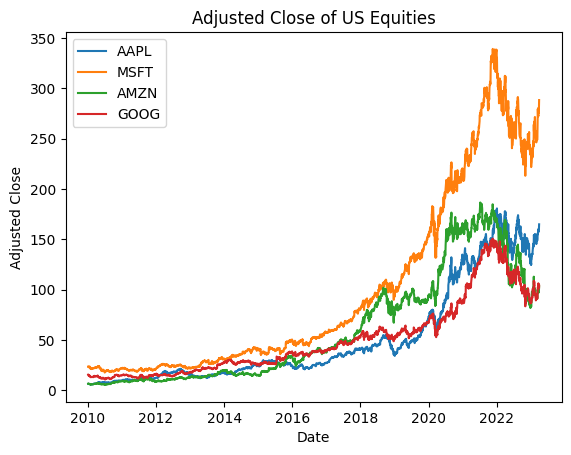

In [ ]:
# Plot the adjusted close
fig, ax = plt.subplots()
ax.plot(adj_close.index, adj_close['AAPL'], label='AAPL')
ax.plot(adj_close.index, adj_close['MSFT'], label='MSFT')
ax.plot(adj_close.index, adj_close['AMZN'], label='AMZN')
ax.plot(adj_close.index, adj_close['GOOG'], label='GOOG')
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted Close')
ax.set_title('Adjusted Close of US Equities')
plt.show()

### daily returns

In [ ]:
# Compute daily returns
daily_returns = data['Adj Close'].pct_change()
daily_returns

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,0.001729,0.005900,-0.004404,0.000323
2010-01-06,-0.015906,-0.018116,-0.025209,-0.006137
2010-01-07,-0.001849,-0.017013,-0.023280,-0.010400
2010-01-08,0.006648,0.027077,0.013331,0.006896
...,...,...,...,...
2023-03-27,-0.012293,-0.000917,-0.028286,-0.014934
2023-03-28,-0.003980,-0.008160,-0.016495,-0.004161
2023-03-29,0.019791,0.030954,0.005328,0.019184


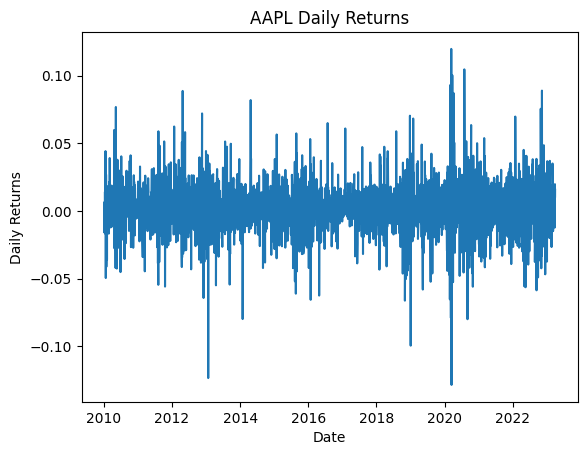

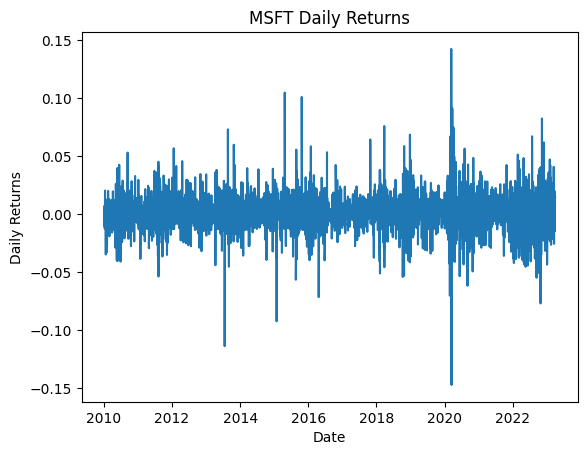

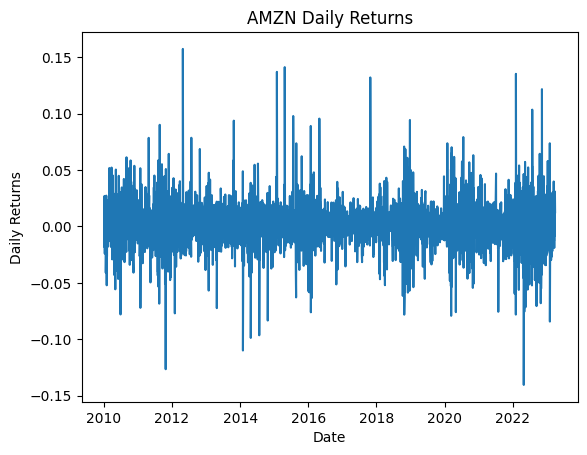

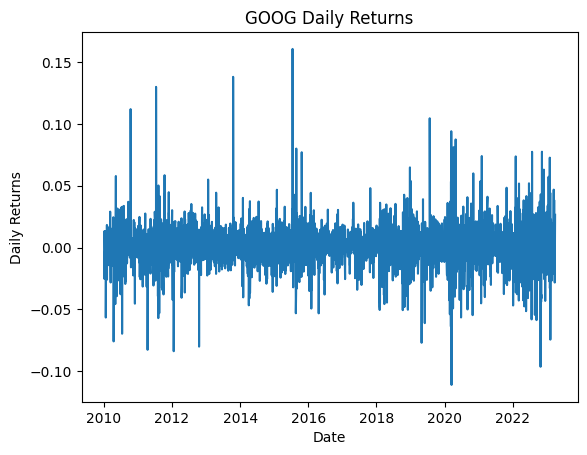

In [ ]:
# Plot the daily returns of each stock in separate plots
for ticker in tickers:
    plt.figure()
    plt.plot(daily_returns[ticker])
    plt.title(ticker + ' Daily Returns')
    plt.xlabel('Date')
    plt.ylabel('Daily Returns')
    plt.show()

### volume

In [ ]:
vol = data['Volume']
vol

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2010-01-04,493729600,151998000,78541293,38409100
2010-01-05,601904800,177038000,120638494,49749600
2010-01-06,552160000,143576000,159744526,58182400
2010-01-07,477131200,220604000,257533695,50559700
2010-01-08,447610800,196610000,189680313,51197400
...,...,...,...,...
2023-03-27,52390300,46721300,25393400,26840200
2023-03-28,45992200,38720100,24913500,21878600
2023-03-29,51305700,49783300,26148300,25087000


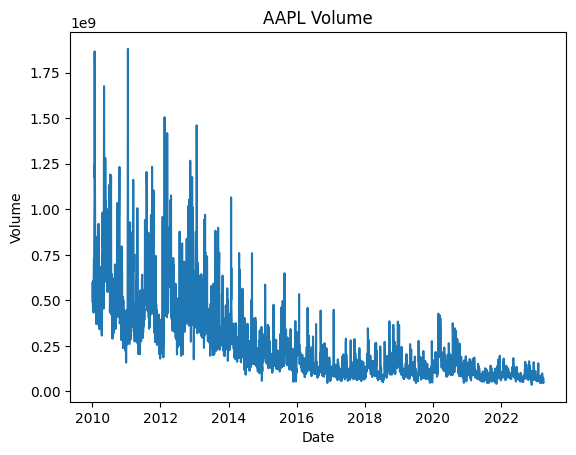

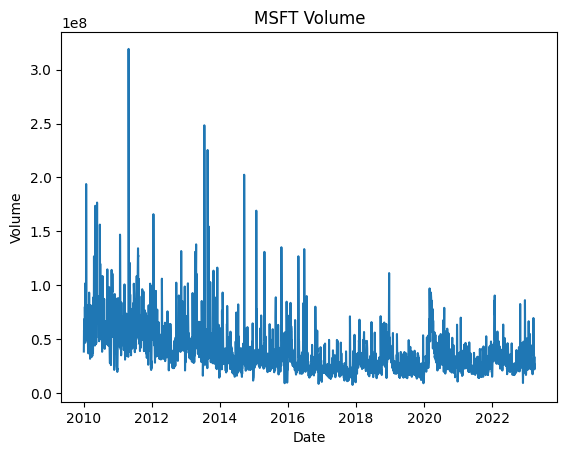

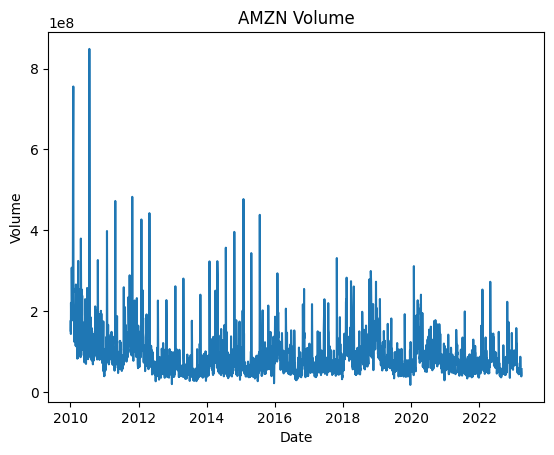

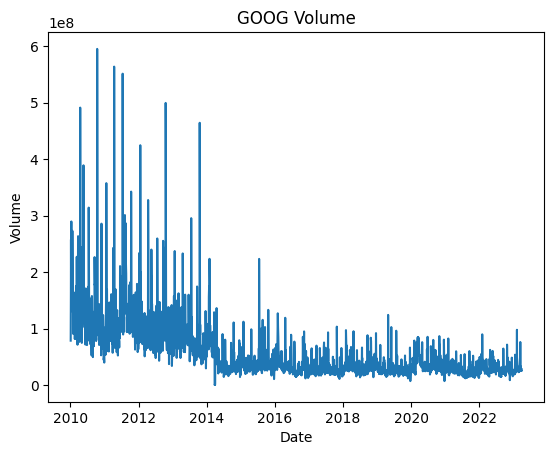

In [ ]:
# Plot the daily volumes of each stock in separate plots
for ticker in tickers:
    plt.figure()
    plt.plot(vol[ticker])
    plt.title(ticker + ' Volume')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.show()

### daily volume change

In [ ]:
# Compute daily volume change
daily_vol_ch = data['Volume'].pct_change()
daily_vol_ch

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,0.219098,0.164739,0.535988,0.295256
2010-01-06,-0.082646,-0.189010,0.324159,0.169505
2010-01-07,-0.135882,0.536496,0.612160,-0.131014
2010-01-08,-0.061871,-0.108765,-0.263474,0.012613
...,...,...,...,...
2023-03-27,-0.114976,-0.167110,0.005878,-0.047274
2023-03-28,-0.122124,-0.171254,-0.018899,-0.184857
2023-03-29,0.115530,0.285722,0.049563,0.146646


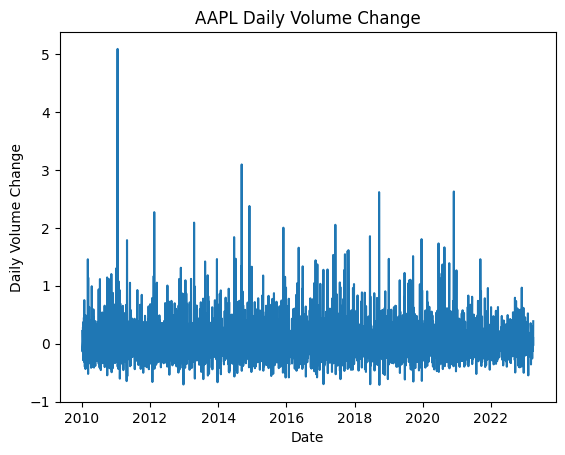

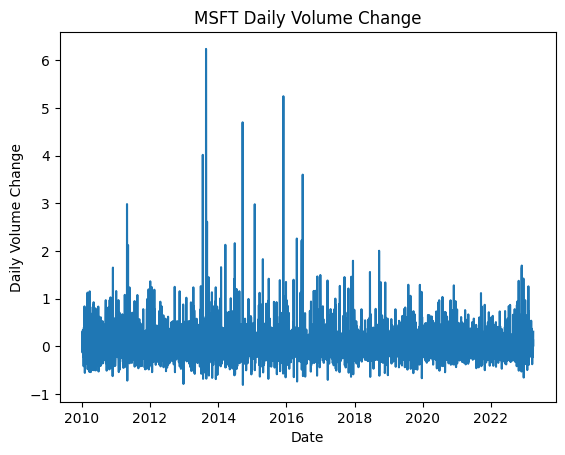

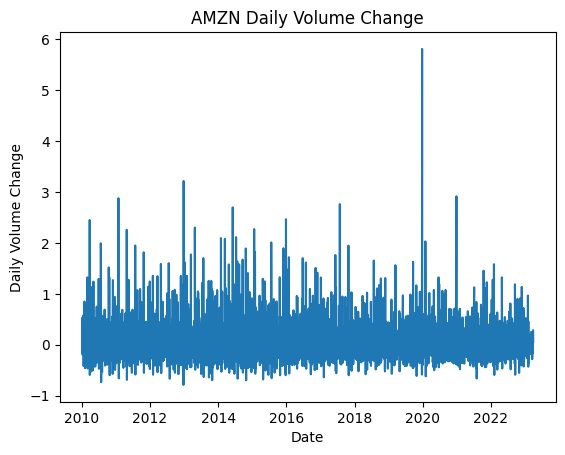

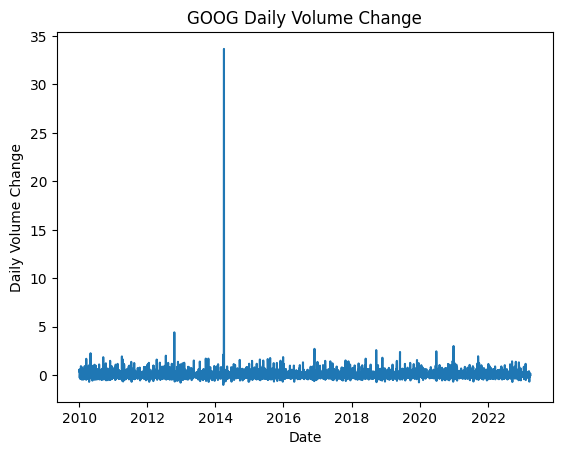

In [ ]:
# Plot the daily returns of each stock in separate plots
for ticker in tickers:
    plt.figure()
    plt.plot(daily_vol_ch[ticker])
    plt.title(ticker + ' Daily Volume Change')
    plt.xlabel('Date')
    plt.ylabel('Daily Volume Change')
    plt.show()

### momentum

In [ ]:
momentum = daily_returns.rolling(window=10).mean()
momentum

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN
...,...,...,...,...
2023-03-27,0.005126,0.006091,0.012051,0.008687
2023-03-28,0.003319,0.002625,0.007576,0.005565
2023-03-29,0.005036,0.004329,0.005669,0.005701


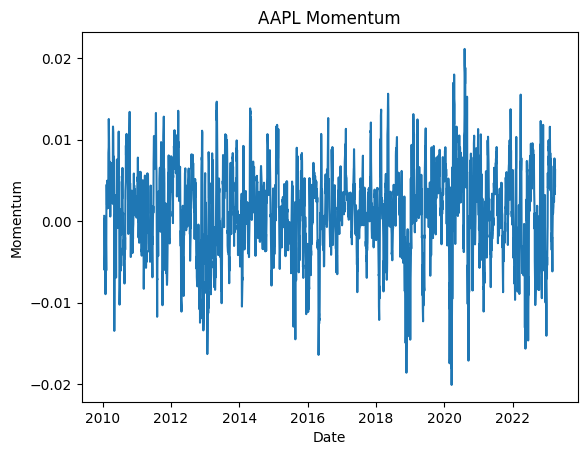

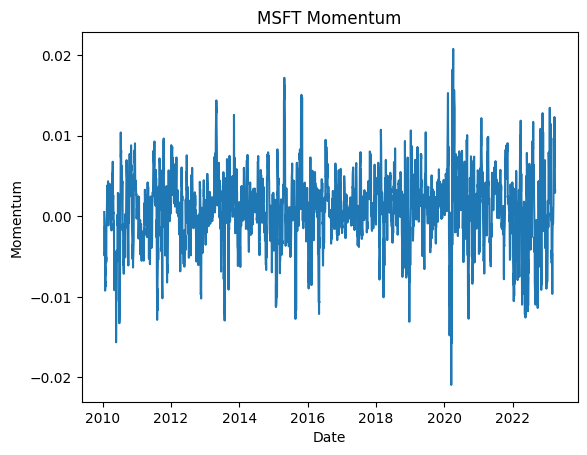

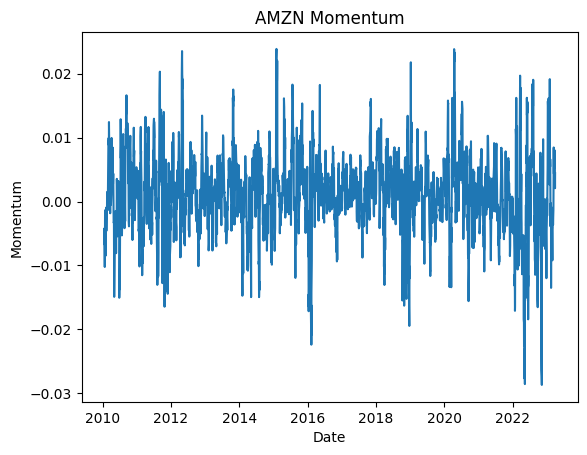

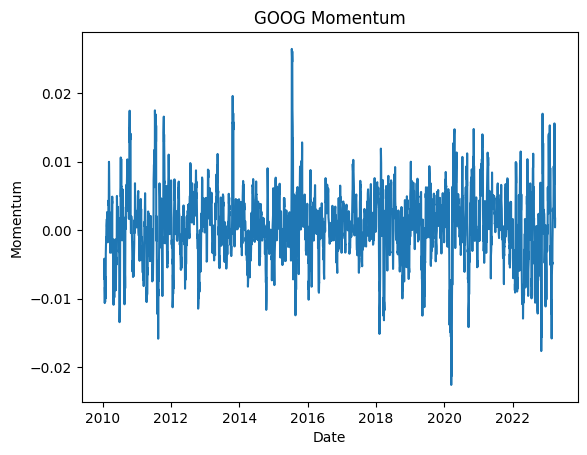

In [ ]:
# Plot the momentum factor of each stock in separate plots
for ticker in tickers:
    plt.figure()
    plt.plot(momentum[ticker])
    plt.title(ticker + ' Momentum')
    plt.xlabel('Date')
    plt.ylabel('Momentum')
    plt.show()

### mean reversion

In [ ]:
mean_rever = (adj_close - adj_close.rolling(window=10).mean()) / adj_close.rolling(window=10).std()
mean_rever

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN
...,...,...,...,...
2023-03-27,0.546145,-0.093162,0.220981,0.467054
2023-03-28,0.139726,-0.926704,-0.513831,0.071318
2023-03-29,1.466556,1.244239,-0.748909,1.308434


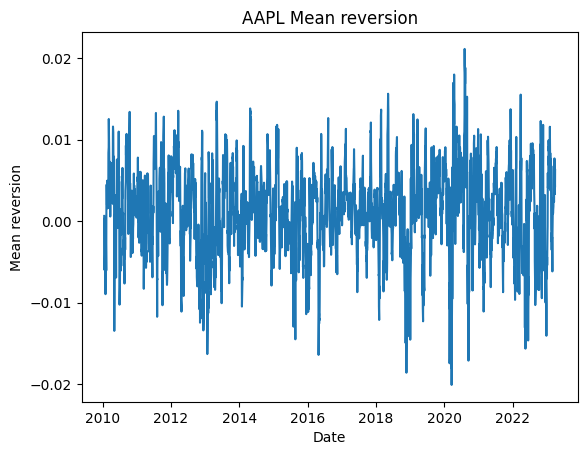

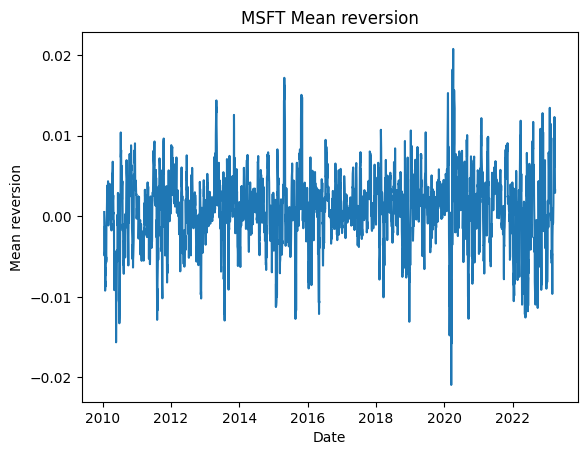

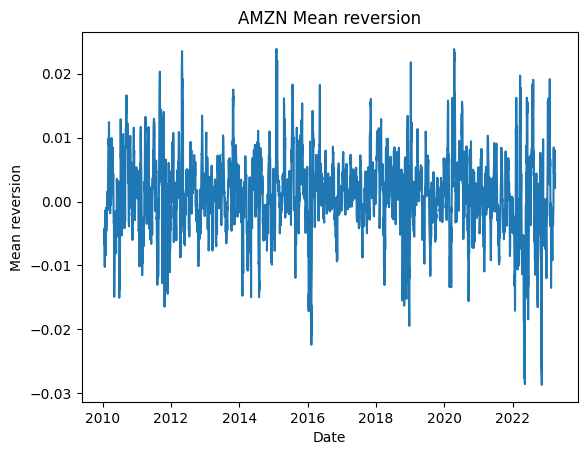

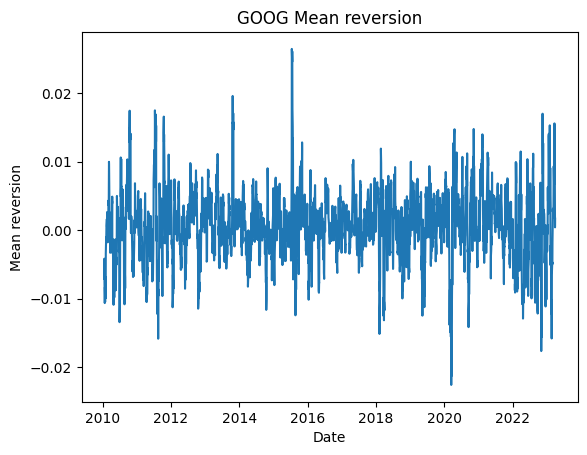

In [ ]:
# Plot the mean reversion factor of each stock in separate plots
for ticker in tickers:
    plt.figure()
    plt.plot(momentum[ticker])
    plt.title(ticker + ' Mean reversion')
    plt.xlabel('Date')
    plt.ylabel('Mean reversion')
    plt.show()

### volatility

In [ ]:
volatility = daily_returns.rolling(window=10).std()
volatility

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN
...,...,...,...,...
2023-03-27,0.010831,0.020196,0.024133,0.019785
2023-03-28,0.010676,0.019256,0.024930,0.019012
2023-03-29,0.011866,0.021037,0.024219,0.019114


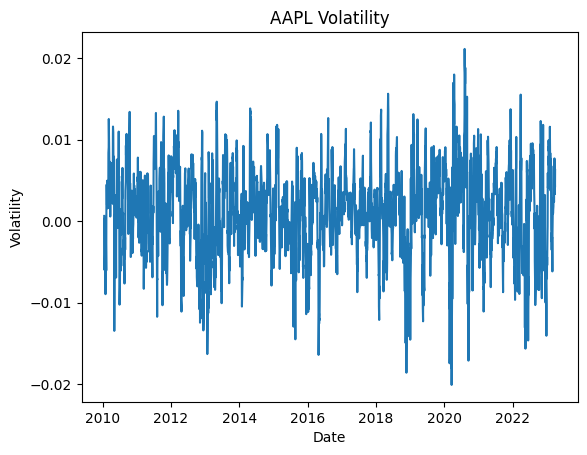

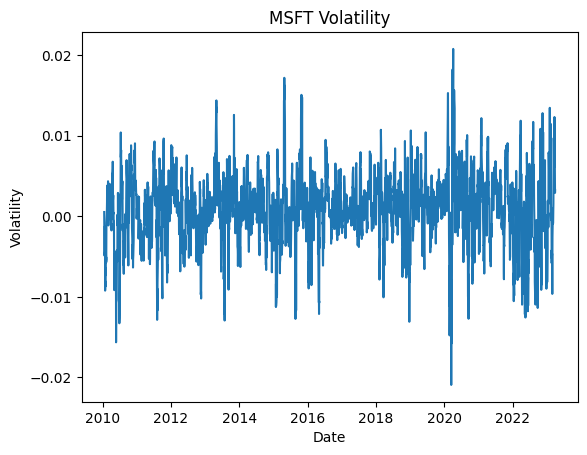

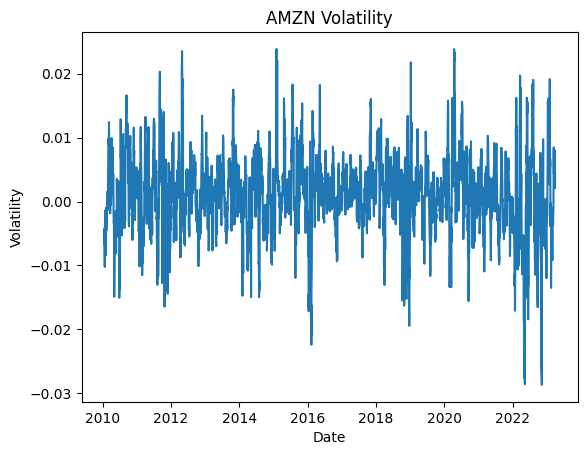

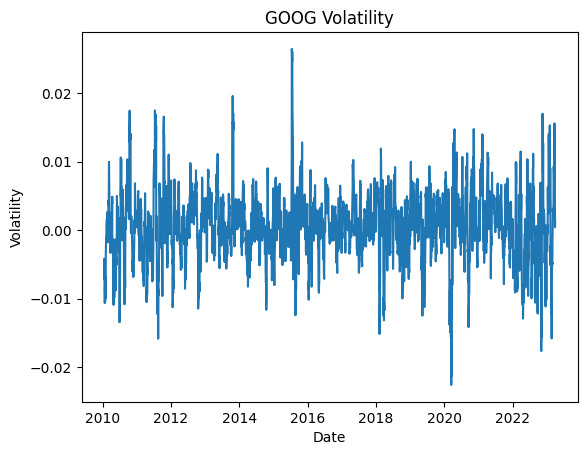

In [ ]:
# Plot the volatility factor of each stock in separate plots
for ticker in tickers:
    plt.figure()
    plt.plot(momentum[ticker])
    plt.title(ticker + ' Volatility')
    plt.xlabel('Date')
    plt.ylabel('Volatility')
    plt.show()

### rolling correlation with the market

In [ ]:
market_returns = daily_returns.mean(axis=1)
market_returns

Date
2010-01-04         NaN
2010-01-05    0.000887
2010-01-06   -0.016342
2010-01-07   -0.013135
2010-01-08    0.013488
                ...   
2023-03-27   -0.014108
2023-03-28   -0.008199
2023-03-29    0.018814
2023-03-30    0.008569
2023-03-31    0.017426
Length: 3334, dtype: float64

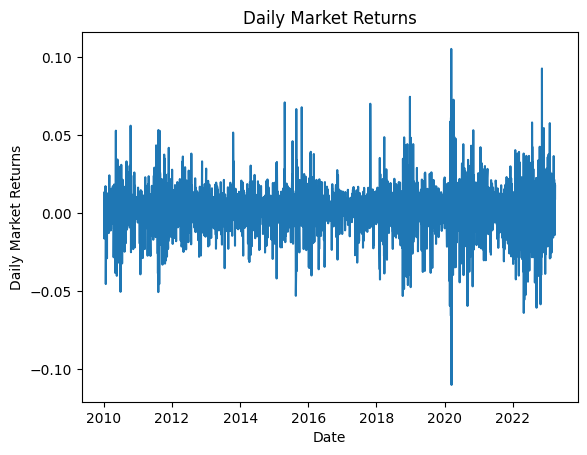

In [ ]:
plt.figure()
plt.plot(market_returns)
plt.title('Daily Market Returns')
plt.xlabel('Date')
plt.ylabel('Daily Market Returns')
plt.show()

In [ ]:
rolling_corr = daily_returns.rolling(window=30).corr(other=market_returns)
rolling_corr

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN
...,...,...,...,...
2023-03-27,0.863489,0.911690,0.905204,0.881178
2023-03-28,0.857658,0.908355,0.925615,0.879472
2023-03-29,0.865866,0.910282,0.910283,0.885095


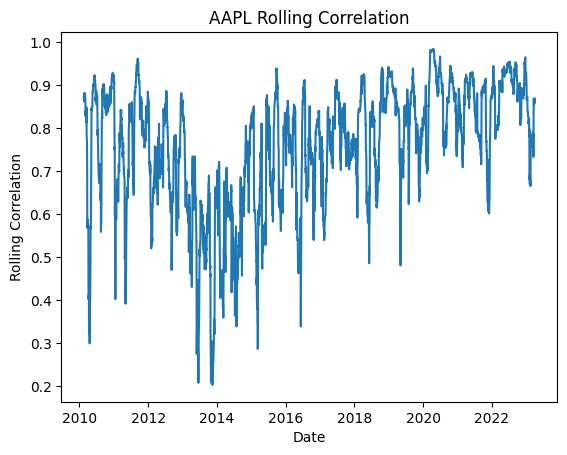

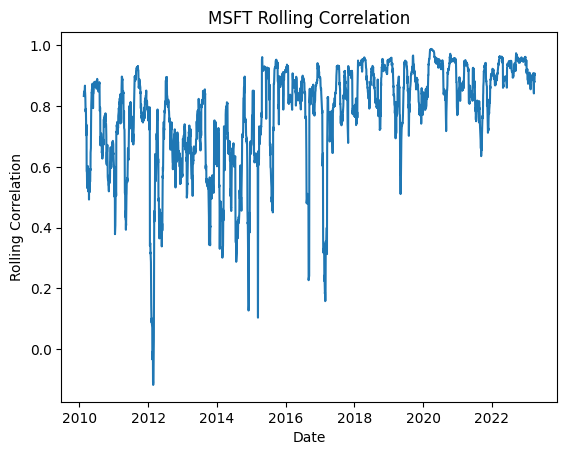

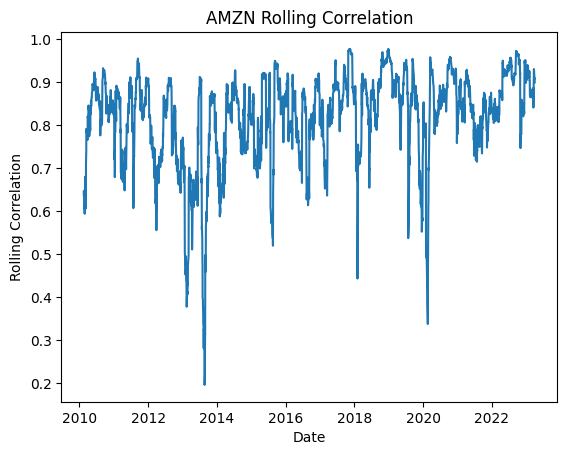

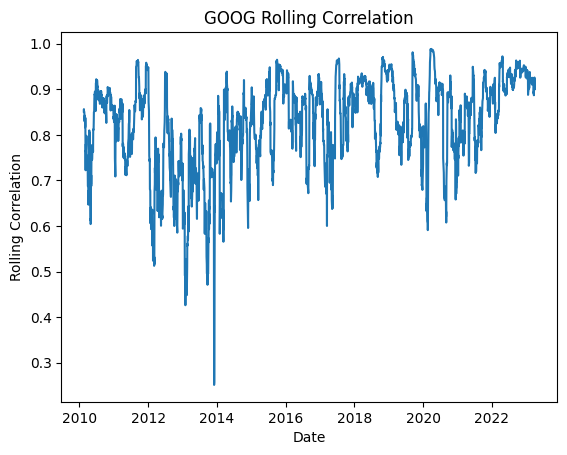

In [ ]:
# Plot the rolling correlation with the market of each stock in separate plots
for ticker in tickers:
    plt.figure()
    plt.plot(rolling_corr[ticker])
    plt.title(ticker + ' Rolling Correlation')
    plt.xlabel('Date')
    plt.ylabel('Rolling Correlation')
    plt.show()

## statistical analysis of alpha factors



visualise the correlation matrices between the alpha factors for each ticker using a heatmap.

In [ ]:
# Create a dictionary alpha_factors_dict
tickers = ['AAPL', 'AMZN', 'GOOG', 'MSFT']
alpha_factors_dict = {}

for ticker in tickers:
    alpha_factors_dict[ticker] = pd.concat([vol[ticker].rename(ticker + '_volume'),
                                    daily_vol_ch[ticker].rename(ticker + '_daily_vol_ch'),
                                    momentum[ticker].rename(ticker + '_momentum'),
                                    mean_rever[ticker].rename(ticker + '_mean_rever'),
                                    volatility[ticker].rename(ticker + '_volatility'),
                                    rolling_corr[ticker].rename(ticker + '_rolling_corr')],
                                    axis=1)

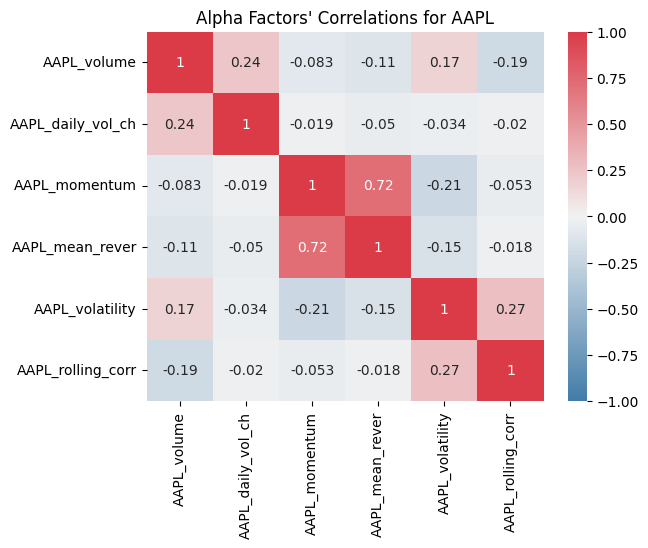

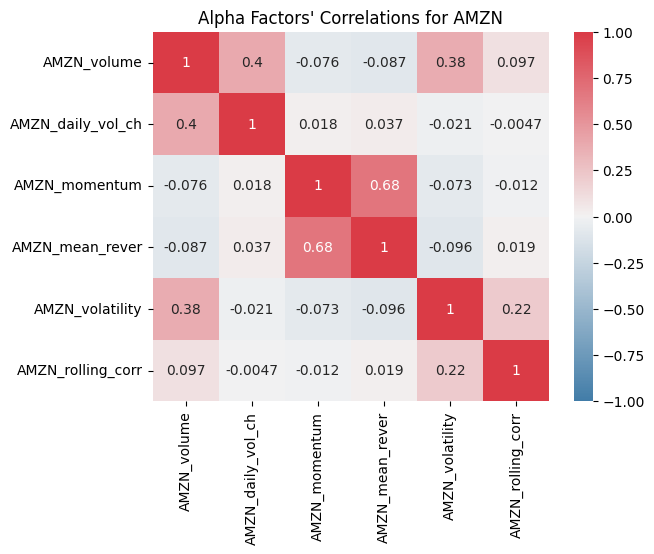

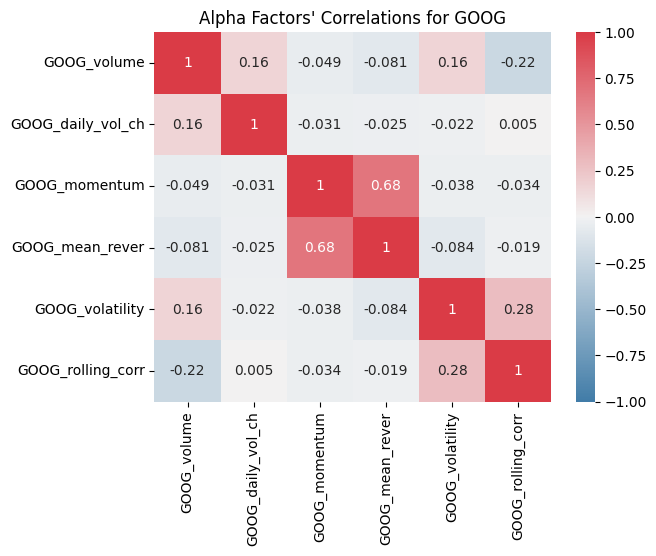

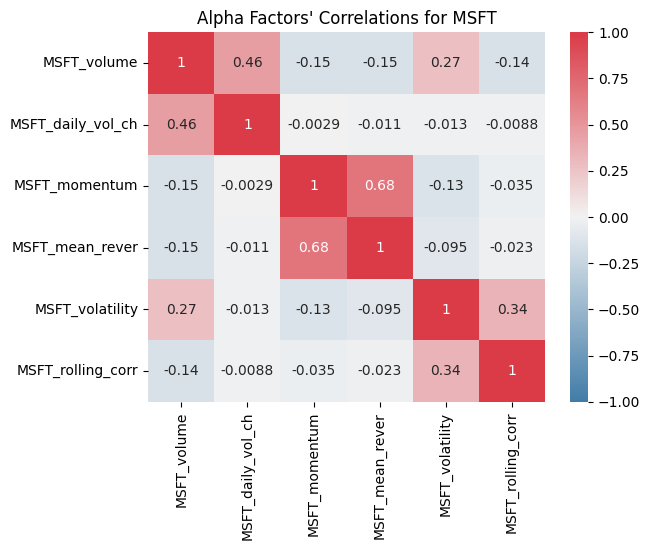

In [ ]:
# Visualise the correlation matrices
for ticker, df in alpha_factors_dict.items():
    plt.figure()
    cmap = sns.diverging_palette(240, 10, as_cmap=True)
    sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap=cmap)
    plt.title(f"Alpha Factors' Correlations for {ticker}")

rank the top 10 most correlated pairs of alpha factors

In [ ]:
# Combine the alpha factors into a single DataFrame
alpha_factors = pd.concat([vol.rename(columns=lambda x: x + '_volume'),
                daily_vol_ch.rename(columns=lambda x: x + '_daily_vol_ch'),
                momentum.rename(columns=lambda x: x + '_momentum'),
                mean_rever.rename(columns=lambda x: x + '_mean_rever'),
                volatility.rename(columns=lambda x: x + '_volatility'),
                rolling_corr.rename(columns=lambda x: x + '_rolling_corr')],
               axis=1)
alpha_factors

,AAPL_volume,AMZN_volume,GOOG_volume,MSFT_volume,AAPL_daily_vol_ch,AMZN_daily_vol_ch,GOOG_daily_vol_ch,MSFT_daily_vol_ch,AAPL_momentum,AMZN_momentum,...,GOOG_mean_rever,MSFT_mean_rever,AAPL_volatility,AMZN_volatility,GOOG_volatility,MSFT_volatility,AAPL_rolling_corr,AMZN_rolling_corr,GOOG_rolling_corr,MSFT_rolling_corr
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,493729600,151998000,78541293,38409100,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,601904800,177038000,120638494,49749600,0.219098,0.164739,0.535988,0.295256,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,552160000,143576000,159744526,58182400,-0.082646,-0.189010,0.324159,0.169505,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,477131200,220604000,257533695,50559700,-0.135882,0.536496,0.612160,-0.131014,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,447610800,196610000,189680313,51197400,-0.061871,-0.108765,-0.263474,0.012613,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-27,52390300,46721300,25393400,26840200,-0.114976,-0.167110,0.005878,-0.047274,0.005126,0.006091,...,0.220981,0.467054,0.010831,0.020196,0.024133,0.019785,0.863489,0.911690,0.905204,0.881178
2023-03-28,45992200,38720100,24913500,21878600,-0.122124,-0.171254,-0.018899,-0.184857,0.003319,0.002625,...,-0.513831,0.071318,0.010676,0.019256,0.024930,0.019012,0.857658,0.908355,0.925615,0.879472
2023-03-29,51305700,49783300,26148300,25087000,0.115530,0.285722,0.049563,0.146646,0.005036,0.004329,...,-0.748909,1.308434,0.011866,0.021037,0.024219,0.019114,0.865866,0.910282,0.910283,0.885095


In [ ]:
# Rank the top 10 most correlated pairs of alpha factors

# Compute the correlation matrix of alpha_factors
corr_matrix = alpha_factors.corr()

# Stack the correlation matrix and sort by correlation values
corr_pairs = corr_matrix.stack().abs().sort_values(ascending=False)

# Delete every other item in corr_pairs
corr_pairs = corr_pairs.iloc[::2]

# Select the top 10 pairs with highest correlation values
top_corr_pairs = corr_pairs[corr_pairs != 1].iloc[:10]

# Print the result
print(top_corr_pairs)

MSFT_volatility    AAPL_volatility      0.724453
AAPL_mean_rever    AAPL_momentum        0.722182
AAPL_volume        GOOG_volume          0.702099
MSFT_volatility    GOOG_volatility      0.701157
MSFT_mean_rever    MSFT_momentum        0.683323
GOOG_momentum      GOOG_mean_rever      0.679283
AMZN_momentum      AMZN_mean_rever      0.677385
MSFT_rolling_corr  GOOG_rolling_corr    0.670302
AAPL_volatility    GOOG_volatility      0.631273
AMZN_volatility    GOOG_volatility      0.626835
dtype: float64


These correlations can be used to identify potential redundancies in the alpha factors and to construct a more efficient model that captures the most important sources of alpha. For instance, if `MSFT_volatility` and `AAPL_volatility` are highly correlated, it may be redundant to include both factors in a model, as they are likely to contribute similar information. Therefore, one may choose to exclude one of the factors to reduce the complexity of the model and improve its efficiency.

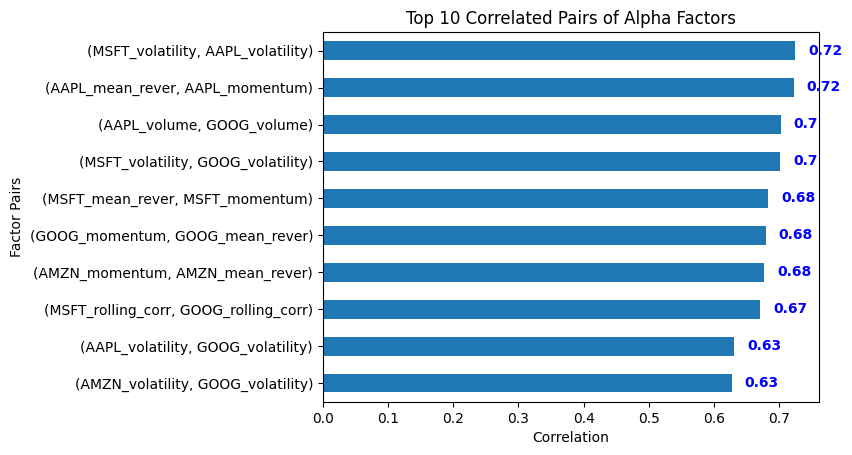

In [ ]:
# Create a bar chart of the top correlated pairs
top_corr_pairs.sort_values().plot(kind='barh')

# Add labels and title
plt.ylabel('Factor Pairs')
plt.xlabel('Correlation')
plt.title('Top 10 Correlated Pairs of Alpha Factors')

# Add the correlation coefficient values to the bars
for i, v in enumerate(top_corr_pairs.sort_values()):
    plt.text(v + 0.02, i - 0.1, str(round(v, 2)), color='blue', fontweight='bold')

# Show the plot
plt.show()

## find Alpha using statistics

In [ ]:
# Analyse the alpha factor's correlation with AAPL's daily returns

# Add AAPL's daily returns to alpha_factors
alpha_factors['AAPL_daily_returns'] = daily_returns['AAPL']

# Compute the correlation matrix for all pairs of columns in alpha_factors
corr_matrix = alpha_factors.corr()

# Select the column of interest to sort by
col_of_interest = 'AAPL_daily_returns'

# Sort the correlation matrix by the values in the column of interest
sorted_corr = corr_matrix[col_of_interest].sort_values(ascending=False)[1:]

# Print the result
print(sorted_corr)

AAPL_mean_rever      0.542228
MSFT_mean_rever      0.323220
AAPL_momentum        0.317655
GOOG_mean_rever      0.286893
AMZN_mean_rever      0.268760
MSFT_momentum        0.216744
GOOG_momentum        0.159853
AMZN_momentum        0.149403
AMZN_rolling_corr    0.027276
GOOG_rolling_corr    0.015095
GOOG_volatility      0.010250
AMZN_volatility      0.009014
AAPL_rolling_corr    0.006871
MSFT_volatility      0.000127
AAPL_volatility     -0.002579
MSFT_rolling_corr   -0.009188
GOOG_volume         -0.046466
AAPL_volume         -0.051337
AMZN_volume         -0.057159
AMZN_daily_vol_ch   -0.058389
GOOG_daily_vol_ch   -0.068739
MSFT_volume         -0.088657
AAPL_daily_vol_ch   -0.093028
MSFT_daily_vol_ch   -0.114266
Name: AAPL_daily_returns, dtype: float64


`AAPL_mean_rever` has the highest positive correlation with the daily returns, indicating that this alpha factor may be a good predictor of the stock's performance. On the other hand, the factors with low correlations may not be useful in predicting the stock's performance.

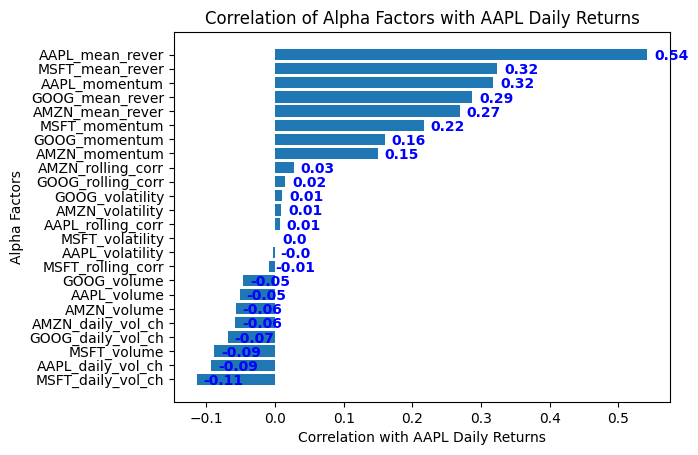

In [ ]:
# Sort the correlations in ascending order
sorted_corr = sorted_corr.sort_values(ascending=True)

# Create a horizontal bar chart of the sorted correlations
plt.barh(sorted_corr.index, sorted_corr.values)

# Add labels and title
plt.xlabel('Correlation with AAPL Daily Returns')
plt.ylabel('Alpha Factors')
plt.title('Correlation of Alpha Factors with AAPL Daily Returns')

# Add the correlation coefficient to each bar
for index, value in enumerate(sorted_corr.values):
    plt.text(value + 0.01, 
             index - 0.1, 
             str(round(value, 2)), color='blue', 
             va='center',
             fontweight='bold')

# Show the plot
plt.show()

## find Alpha using machine learning

In [ ]:
# Define the target variable
target = daily_returns['AAPL'].shift(-1)

# Drop AAPL's daily returns to alpha_factors
alpha_factors = alpha_factors.drop(['AAPL_daily_returns'], axis=1)

# Fill missing values with 0
alpha_factors = alpha_factors.fillna(0) #(alpha_factors.median())
target = target.fillna(0) #(target.median())

# Split the data into training and testing samples
# Create TimeSeriesSplit object
tscv = TimeSeriesSplit(n_splits=5)

# Split the data into training and testing samples
for train_index, test_index in tscv.split(alpha_factors):
    X_train, X_test = alpha_factors.iloc[train_index], alpha_factors.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2779, 24), (555, 24), (2779,), (555,))

In [ ]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Create a random forest regressor
regressor = RandomForestRegressor(random_state=0)

# Create the grid search object
grid_search = GridSearchCV(regressor, param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found by the grid search
print("Best parameters: ", grid_search.best_params_)

# Train the random forest regressor with the best parameters
best_regressor = RandomForestRegressor(n_estimators=grid_search.best_params_['n_estimators'],
                                        max_depth=grid_search.best_params_['max_depth'],
                                        min_samples_split=grid_search.best_params_['min_samples_split'],
                                        random_state=0)
best_regressor.fit(X_train, y_train)


Best parameters:  {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 150}


RandomForestRegressor(max_depth=5, min_samples_split=10, n_estimators=150,
                      random_state=0)

In [ ]:
# Print alpha_factors and their corresponding feature_importance
importances = best_regressor.feature_importances_
indices = np.argsort(importances)[::-1]
for i in indices:
    print(f"{alpha_factors.columns[i]}: {importances[i]:.3f}")

MSFT_momentum: 0.139
AAPL_volatility: 0.096
GOOG_momentum: 0.096
MSFT_mean_rever: 0.077
MSFT_volatility: 0.073
AAPL_momentum: 0.060
MSFT_rolling_corr: 0.055
AMZN_rolling_corr: 0.045
GOOG_rolling_corr: 0.041
GOOG_volume: 0.038
AMZN_mean_rever: 0.035
AAPL_daily_vol_ch: 0.026
AAPL_volume: 0.024
AMZN_volume: 0.024
GOOG_volatility: 0.023
GOOG_daily_vol_ch: 0.022
MSFT_volume: 0.020
AAPL_mean_rever: 0.020
AMZN_volatility: 0.019
AAPL_rolling_corr: 0.018
AMZN_daily_vol_ch: 0.017
MSFT_daily_vol_ch: 0.014
GOOG_mean_rever: 0.011
AMZN_momentum: 0.007


The factors with higher importance scores are expected to have a stronger impact on the target variable. For example, from the output we can see that `MSFT_momentum`, `AAPL_daily_vol_ch`, and `GOOG_momentum` are the top three factors with the highest importance scores.

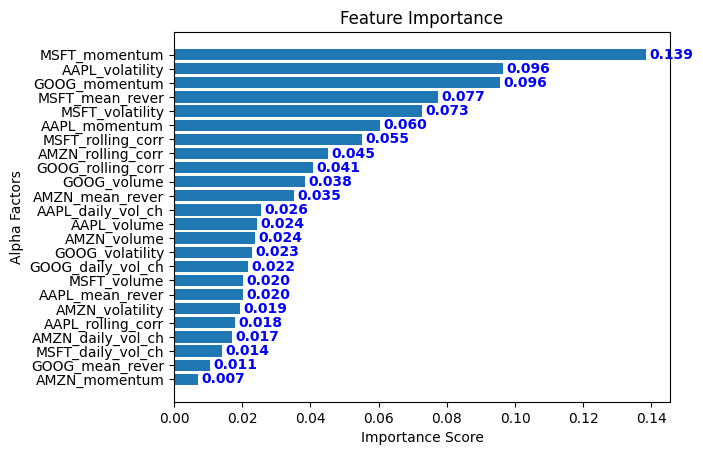

In [ ]:
# Visualize feature importances
plt.barh(range(alpha_factors.shape[1]), importances[indices])
plt.yticks(range(alpha_factors.shape[1]), alpha_factors.columns[indices])

# Add importance scores to bars
for i, v in enumerate(importances[indices]):
    plt.text(v + 0.001, i, f"{v:.3f}", color='blue', va='center', fontweight='bold')

# Invert y-axis to display most important feature on top
plt.gca().invert_yaxis() 

# Add title and x and y labels
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Alpha Factors')

plt.show()

In [ ]:
# Evaluate the performance of the regressor on the test set
y_pred = best_regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the evaluation metrics
print('R-squared score:', r2)
print('Mean squared error:', mse)

R-squared score: -0.007512235284516944
Mean squared error: 0.00036396350048579254


## strategy formulation and backtesting
create a trading strategy based on the predictions from the machine learning model and backtest the strategy.

**long-short trading strategy:**

The long-short trading strategy here is based on the model perdiction of AAPL's next day return. The strategy is to take long positions when the predicted value is greater than a predefined threshold and to take short positions when the predicted value is less than the threshold.

Total return: 24.64%
Annualized return: 10.52%
Maximum drawdown: -37.16%
Tracking error: 0.0263
Information ratio: 0.0072
Sharpe ratio: 5.5300
Sortino ratio: 8.7710
Treynor ratio: 8.2008
Jensen's alpha: 10.51%
Beta: 0.0128
Alpha: 8.55%


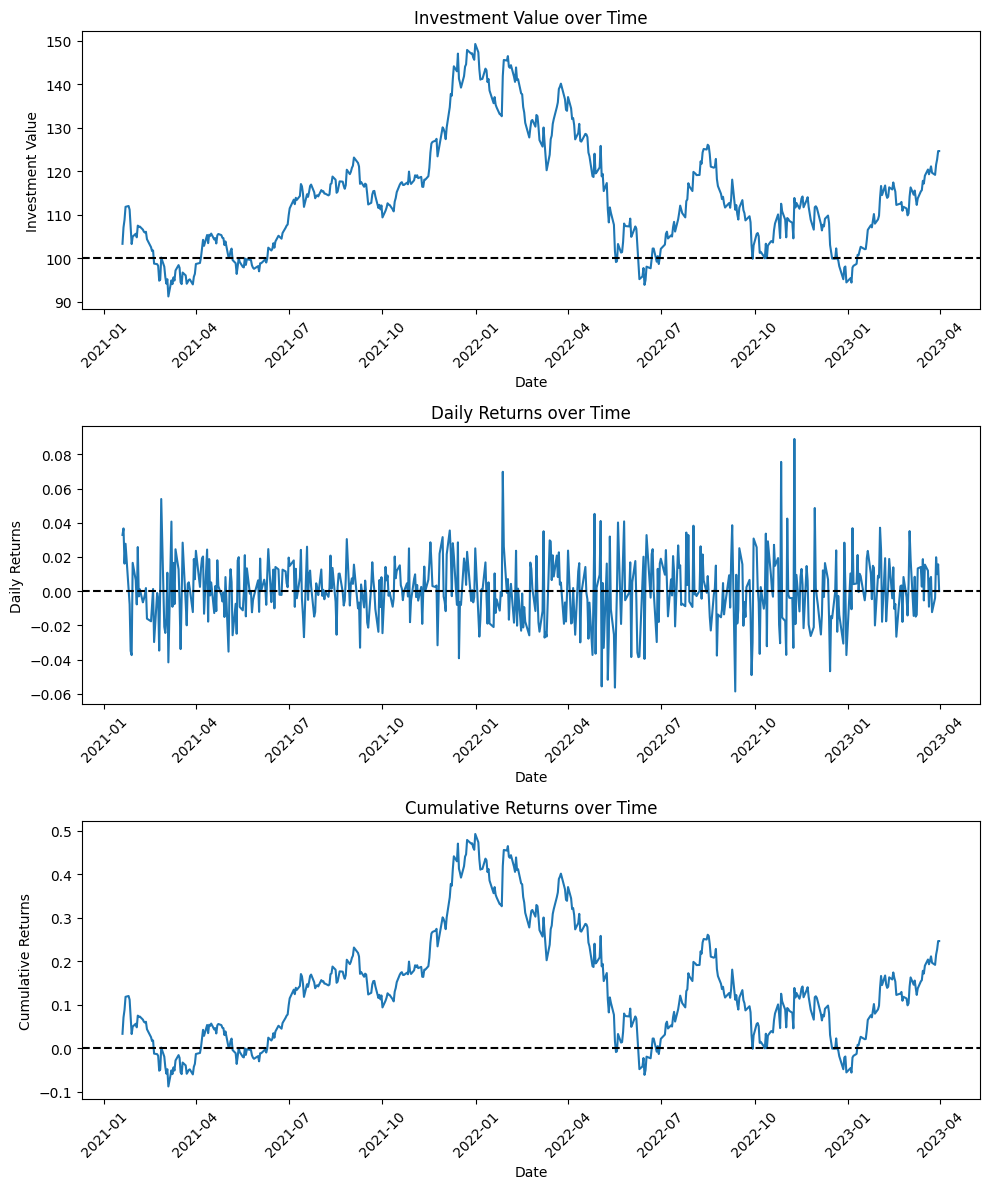

In [ ]:
# Set initial investment value
initial_investment = 100

# Combine test_pred and y_test into a new DataFrame
backtest = pd.DataFrame({'test_pred': y_pred, 'target': y_test.values}, index=y_test.index)

# Define the threshold value
threshold = 0.00

# Create a signal column based on the threshold
backtest['signal'] = np.where(backtest['test_pred'] > threshold, 1, -1)

# Calculate the daily returns based on the signal and target columns
backtest['daily_returns'] = backtest['signal'] * backtest['target']

# Calculate the value of investment based on the daily returns
backtest['investment_value'] = (1 + backtest['daily_returns']).cumprod() * initial_investment

# Calculate the cumulative returns
backtest['cumulative_returns'] = (1 + backtest['daily_returns']).cumprod() - 1

# Calculate total return
total_return = backtest['cumulative_returns'].iloc[-1]

# Calculate annualized return
annualized_return = ((1 + total_return) ** (252 / len(backtest))) - 1

# Calculate maximum drawdown
investment_value = backtest['investment_value']
max_drawdown = (investment_value / investment_value.cummax() - 1).min()

# Calculate tracking error
benchmark_returns = market_returns[-555:]
portfolio_returns = backtest['daily_returns']
tracking_error = np.std(portfolio_returns - benchmark_returns)

# Calculate information ratio
excess_returns = portfolio_returns - benchmark_returns
information_ratio = np.mean(excess_returns) / np.std(excess_returns)

# Calculate Sharpe ratio
risk_free_rate = 0.02 # assume a 2% annual risk-free rate
daily_risk_free_rate = (1 + risk_free_rate) ** (1/252) - 1
portfolio_volatility = np.std(portfolio_returns)
sharpe_ratio = (annualized_return - daily_risk_free_rate) / portfolio_volatility

# Calculate Sortino ratio
downside_returns = portfolio_returns[portfolio_returns < 0]
downside_deviation = np.std(downside_returns)
sortino_ratio = (annualized_return - daily_risk_free_rate) / downside_deviation

# Calculate Treynor ratio
portfolio_beta = np.cov(portfolio_returns, benchmark_returns)[0, 1] / np.var(benchmark_returns)
treynor_ratio = (annualized_return - daily_risk_free_rate) / portfolio_beta

# Calculate Jensen's alpha
jensens_alpha = annualized_return - (daily_risk_free_rate + portfolio_beta * (benchmark_returns.mean() - daily_risk_free_rate))

# Calculate beta
beta = np.cov(portfolio_returns, benchmark_returns)[0, 1] / np.var(benchmark_returns)

# Calculate alpha
alpha = annualized_return - (risk_free_rate + beta * (benchmark_returns.mean() - risk_free_rate))

# Print the evaluation metrics
print(f'Total return: {total_return:.2%}')
print(f'Annualized return: {annualized_return:.2%}')
print(f'Maximum drawdown: {max_drawdown:.2%}')
print(f'Tracking error: {tracking_error:.4f}')
print(f'Information ratio: {information_ratio:.4f}')
print(f'Sharpe ratio: {sharpe_ratio:.4f}')
print(f'Sortino ratio: {sortino_ratio:.4f}')
print(f'Treynor ratio: {treynor_ratio:.4f}')
print(f"Jensen's alpha: {jensens_alpha:.2%}")
print(f'Beta: {beta:.4f}')
print(f'Alpha: {alpha:.2%}')

# Visualize the investment value, daily returns, and cumulative returns

# Create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))

# Plot the investment value on the first subplot
ax1.plot(backtest.index, backtest['investment_value'])
ax1.axhline(y=100, color='black', linestyle='--')
ax1.set_xlabel('Date')
ax1.set_ylabel('Investment Value')
ax1.set_title('Investment Value over Time')
ax1.tick_params(axis='x', rotation=45) # Rotate x-axis labels by 45 degrees

# Plot the daily returns on the second subplot
ax2.plot(backtest.index, backtest['daily_returns'])
ax2.axhline(y=0, color='black', linestyle='--')
ax2.set_xlabel('Date')
ax2.set_ylabel('Daily Returns')
ax2.set_title('Daily Returns over Time')
ax2.tick_params(axis='x', rotation=45) # Rotate x-axis labels by 45 degrees

# Plot the cumulative returns on the third subplot
ax3.plot(backtest.index, backtest['cumulative_returns'])
ax3.axhline(y=0, color='black', linestyle='--')
ax3.set_xlabel('Date')
ax3.set_ylabel('Cumulative Returns')
ax3.set_title('Cumulative Returns over Time')
ax3.tick_params(axis='x', rotation=45) # Rotate x-axis labels by 45 degrees

# Show the figure
plt.tight_layout()
plt.show()

## conclusion

The trading strategy has performed well in terms of generating positive returns, managing downside risk, and outperforming the market/benchmark. 

This is supported by the fact that the total return was 24.64% and the annualized return was 10.52%. The Sharpe ratio of 5.5300, Sortino ratio of 8.7710, and Treynor ratio of 8.2008 all indicate that the strategy has performed well in terms of risk-adjusted returns. Furthermore, Jensen’s alpha of 10.51% and Alpha of 8.55% suggest that the strategy has outperformed its benchmark.

In [ ]:
# Display all the rows in the the backtest DataFrame
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 7,
                       ):
    display(backtest)

,test_pred,target,signal,daily_returns,investment_value,cumulative_returns
Date,,,,,,
2021-01-19,0.0011610,0.0328561,1,0.0328561,103.2856133,0.0328561
2021-01-20,0.0013284,0.0366584,1,0.0366584,107.0718937,0.0707189
2021-01-21,0.0015319,0.0160738,1,0.0160738,108.7929445,0.0879294
2021-01-22,0.0014623,0.0276838,1,0.0276838,111.8047502,0.1180475
2021-01-25,0.0015390,0.0016793,1,0.0016793,111.9925071,0.1199251
2021-01-26,0.0014627,-0.0076838,1,-0.0076838,111.1319757,0.1113198
2021-01-27,0.0017656,-0.0349854,1,-0.0349854,107.2439831,0.0724398
2021-01-28,0.0013043,-0.0374205,1,-0.0374205,103.2308554,0.0323086
2021-01-29,0.0013739,0.0165202,1,0.0165202,104.9362508,0.0493625


# End of the document